In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\soumy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soumy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\soumy\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("CVD_cleaned - in.csv")
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [3]:
df.duplicated().sum()

80

In [4]:
new_df = df.drop_duplicates()
# new_df=df.drop('BMI',axis='columns')
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [5]:
print(new_df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object


In [6]:
unique_values = new_df['Age_Category'].unique()
print(unique_values)

['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [7]:
# def encode_age_category(x):
#     if '+' in x:
#         return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
#     else:
#         age_range = [int(val) for val in x.split('-')]
#         return age_range[0]  # Taking the lower bound of the age range

# # Apply the function to the 'Age_Category' column
# new_df['Age_Category'] = new_df['Age_Category'].apply(lambda x: encode_age_category(x))
def encode_age_category(x):
    if '+' in x:
        return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
    else:
        age_range = [int(val) for val in x.split('-')]
        return np.median(age_range)  # Calculate the median of the age range

# Apply the function to the 'Age_Category' column
new_df['Age_Category'] = new_df['Age_Category'].apply(lambda x: encode_age_category(x))

In [8]:
encoder=LabelEncoder()
new_df['Exercise']=encoder.fit_transform(new_df['Exercise'])
new_df['Heart_Disease']=encoder.fit_transform(new_df['Heart_Disease'])
new_df['Skin_Cancer']=encoder.fit_transform(new_df['Skin_Cancer'])
new_df['Other_Cancer']=encoder.fit_transform(new_df['Other_Cancer'])
new_df['Depression']=encoder.fit_transform(new_df['Depression'])
new_df['Arthritis']=encoder.fit_transform(new_df['Arthritis'])
new_df['Smoking_History']=encoder.fit_transform(new_df['Smoking_History'])

In [9]:
from collections import Counter
Counter(new_df['Diabetes']).most_common()

[('No', 259062),
 ('Yes', 40170),
 ('No, pre-diabetes or borderline diabetes', 6896),
 ('Yes, but female told only during pregnancy', 2646)]

In [10]:
mapping = {'Yes': '11', 'No': '00', 'Yes, but female told only during pregnancy': '10', 'No, pre-diabetes or borderline diabetes': '01'}
new_df['Diabetes'] = df['Diabetes'].map(mapping)
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,00,1,Female,72.0,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,11,0,Female,72.0,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,11,0,Female,62.0,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,11,0,Male,77.0,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,00,0,Male,85.0,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,00,0,Male,27.0,168,81.65,29.05,0,4,30,8,0
308850,Fair,Within the past 5 years,1,0,0,0,0,11,0,Male,67.0,180,69.85,21.48,0,8,15,60,4
308851,Very Good,5 or more years ago,1,0,0,0,1,10,0,Female,32.0,157,61.23,24.69,1,4,40,8,4
308852,Very Good,Within the past year,1,0,0,0,0,00,0,Male,67.0,183,79.38,23.73,0,3,30,12,0


In [11]:
if 'Checkup' in new_df.columns:
    one_hot_encoded = pd.get_dummies(new_df['Checkup'], prefix='check')
    new_df = pd.concat([new_df, one_hot_encoded], axis=1)
    new_df = new_df.drop('Checkup', axis=1)  

In [12]:
new_df['check_5 or more years ago']=new_df['check_5 or more years ago'].replace({False:0,True:1})
new_df['check_Never']=new_df['check_Never'].replace({False:0,True:1}) 
new_df['check_Within the past 2 years']=new_df['check_Within the past 2 years'].replace({False:0,True:1})
new_df['check_Within the past 5 years']=new_df['check_Within the past 5 years'].replace({False:0,True:1})
new_df['check_Within the past year']=new_df['check_Within the past year'].replace({False:0,True:1})

In [13]:
new_df['General_Health']=new_df['General_Health'].replace({'Poor':1,'Fair':2,'Good':3,'Very Good':4,'Excellent':5}) 
new_df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,check_5 or more years ago,check_Never,check_Within the past 2 years,check_Within the past 5 years,check_Within the past year
0,1,0,0,0,0,0,00,1,Female,72.0,...,1,0,30,16,12,0,0,1,0,0
1,4,0,1,0,0,0,11,0,Female,72.0,...,0,0,30,0,4,0,0,0,0,1
2,4,1,0,0,0,0,11,0,Female,62.0,...,0,4,12,3,16,0,0,0,0,1
3,1,1,1,0,0,0,11,0,Male,77.0,...,0,0,30,30,8,0,0,0,0,1
4,3,0,0,0,0,0,00,0,Male,85.0,...,1,0,8,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,00,0,Male,27.0,...,0,4,30,8,0,0,0,0,0,1
308850,2,1,0,0,0,0,11,0,Male,67.0,...,0,8,15,60,4,0,0,0,1,0
308851,4,1,0,0,0,1,10,0,Female,32.0,...,1,4,40,8,4,1,0,0,0,0
308852,4,1,0,0,0,0,00,0,Male,67.0,...,0,3,30,12,0,0,0,0,0,1


In [14]:
# sex_df = pd.get_dummies(new_df, columns=['Sex'], prefix='sex')
# new_df=pd.concat([new_df,sex_df],axis=1)
# new_df=new_df.drop('Sex',axis=1)
# print(new_df.head())
# sex_df = pd.get_dummies(new_df[['Sex']], prefix='sex', drop_first=True)  # Encode only 'Sex' and drop first category
# new_df = pd.concat([new_df.iloc[:, :23], sex_df], axis=1)  # Concatenate at position 22

# # Drop the original 'Sex' column
# new_df = new_df.drop('Sex', axis=1)

# print(new_df.head())
if 'Sex' in new_df.columns:
    onehot_encoded = pd.get_dummies(new_df['Sex'], prefix='sex')
    new_df = pd.concat([new_df, onehot_encoded], axis=1)
    new_df = new_df.drop('Sex', axis=1)  

In [15]:
new_df['sex_Female']=new_df['sex_Female'].replace({False:0,True:1})
new_df['sex_Male']=new_df['sex_Male'].replace({False:0,True:1})

In [16]:
new_df
new_df.columns

Index(['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'check_5 or more years ago', 'check_Never',
       'check_Within the past 2 years', 'check_Within the past 5 years',
       'check_Within the past year', 'sex_Female', 'sex_Male'],
      dtype='object')

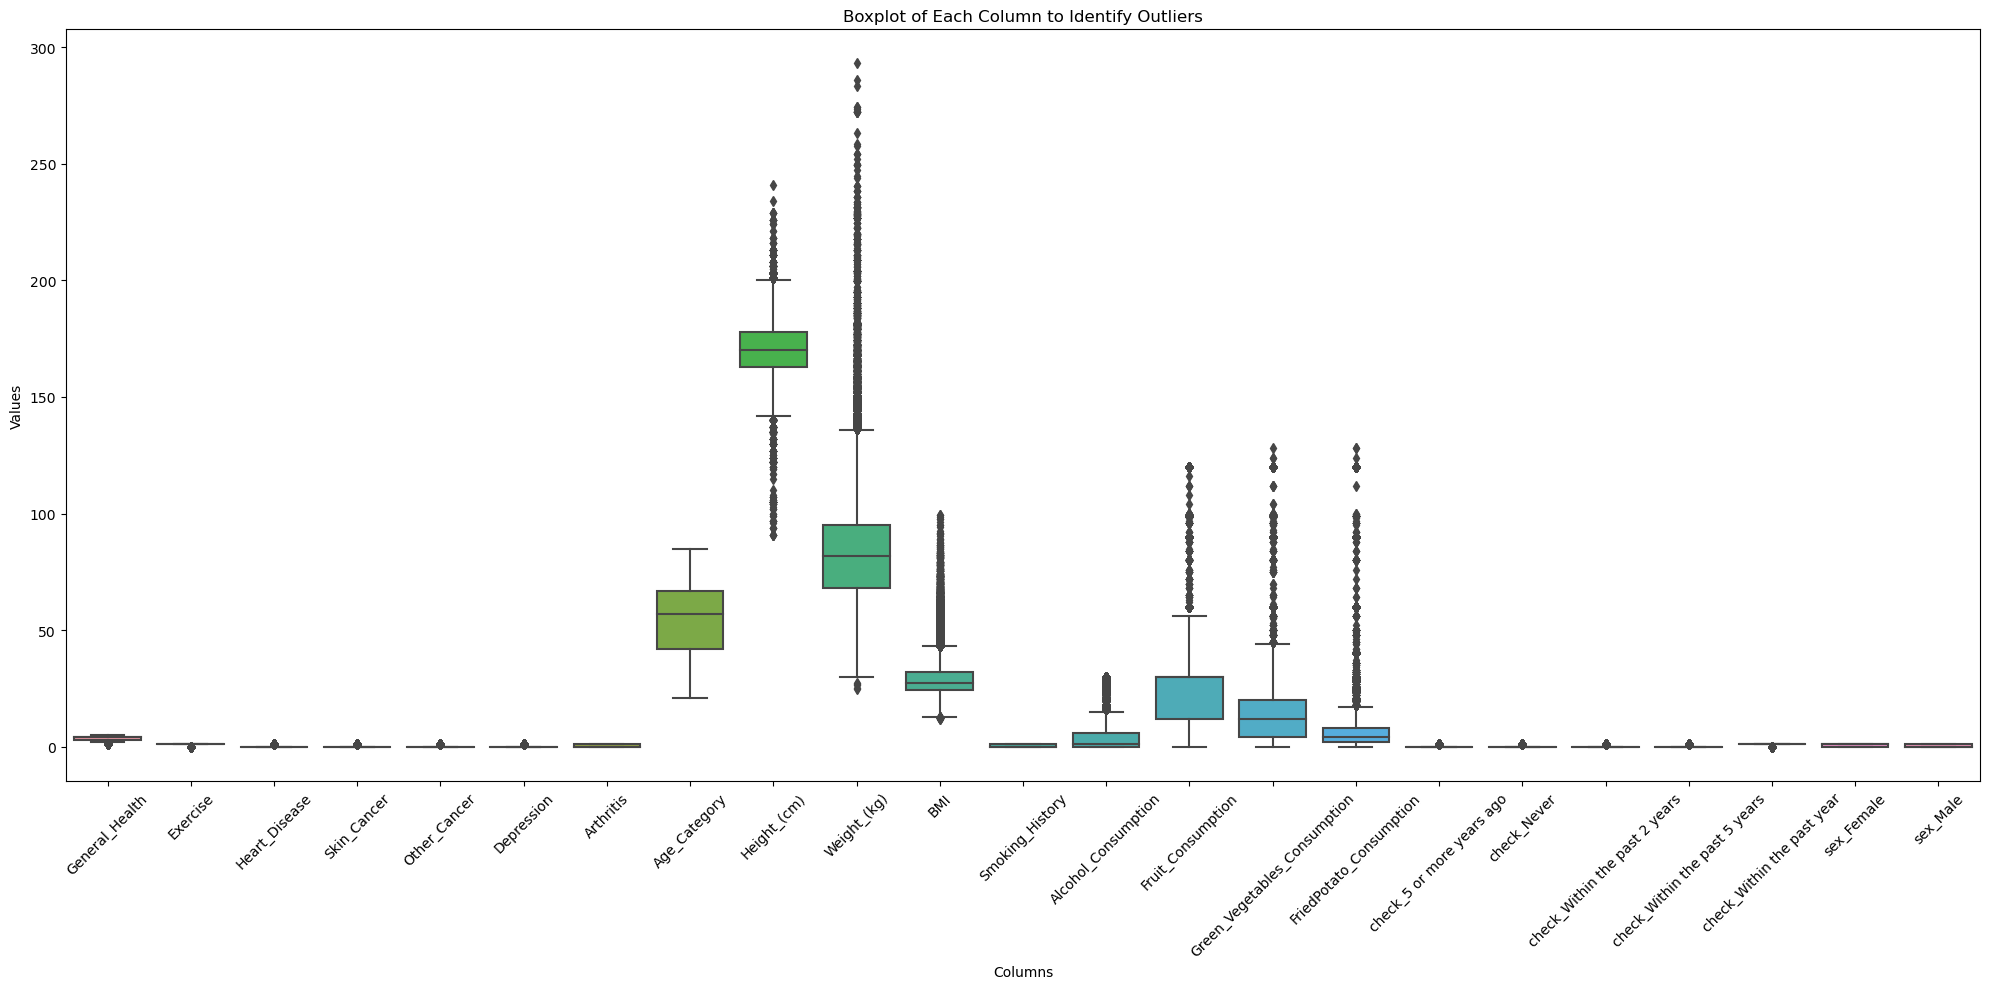

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Each Column to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [18]:
# new_df=new_df.drop('BMI',axis='columns')

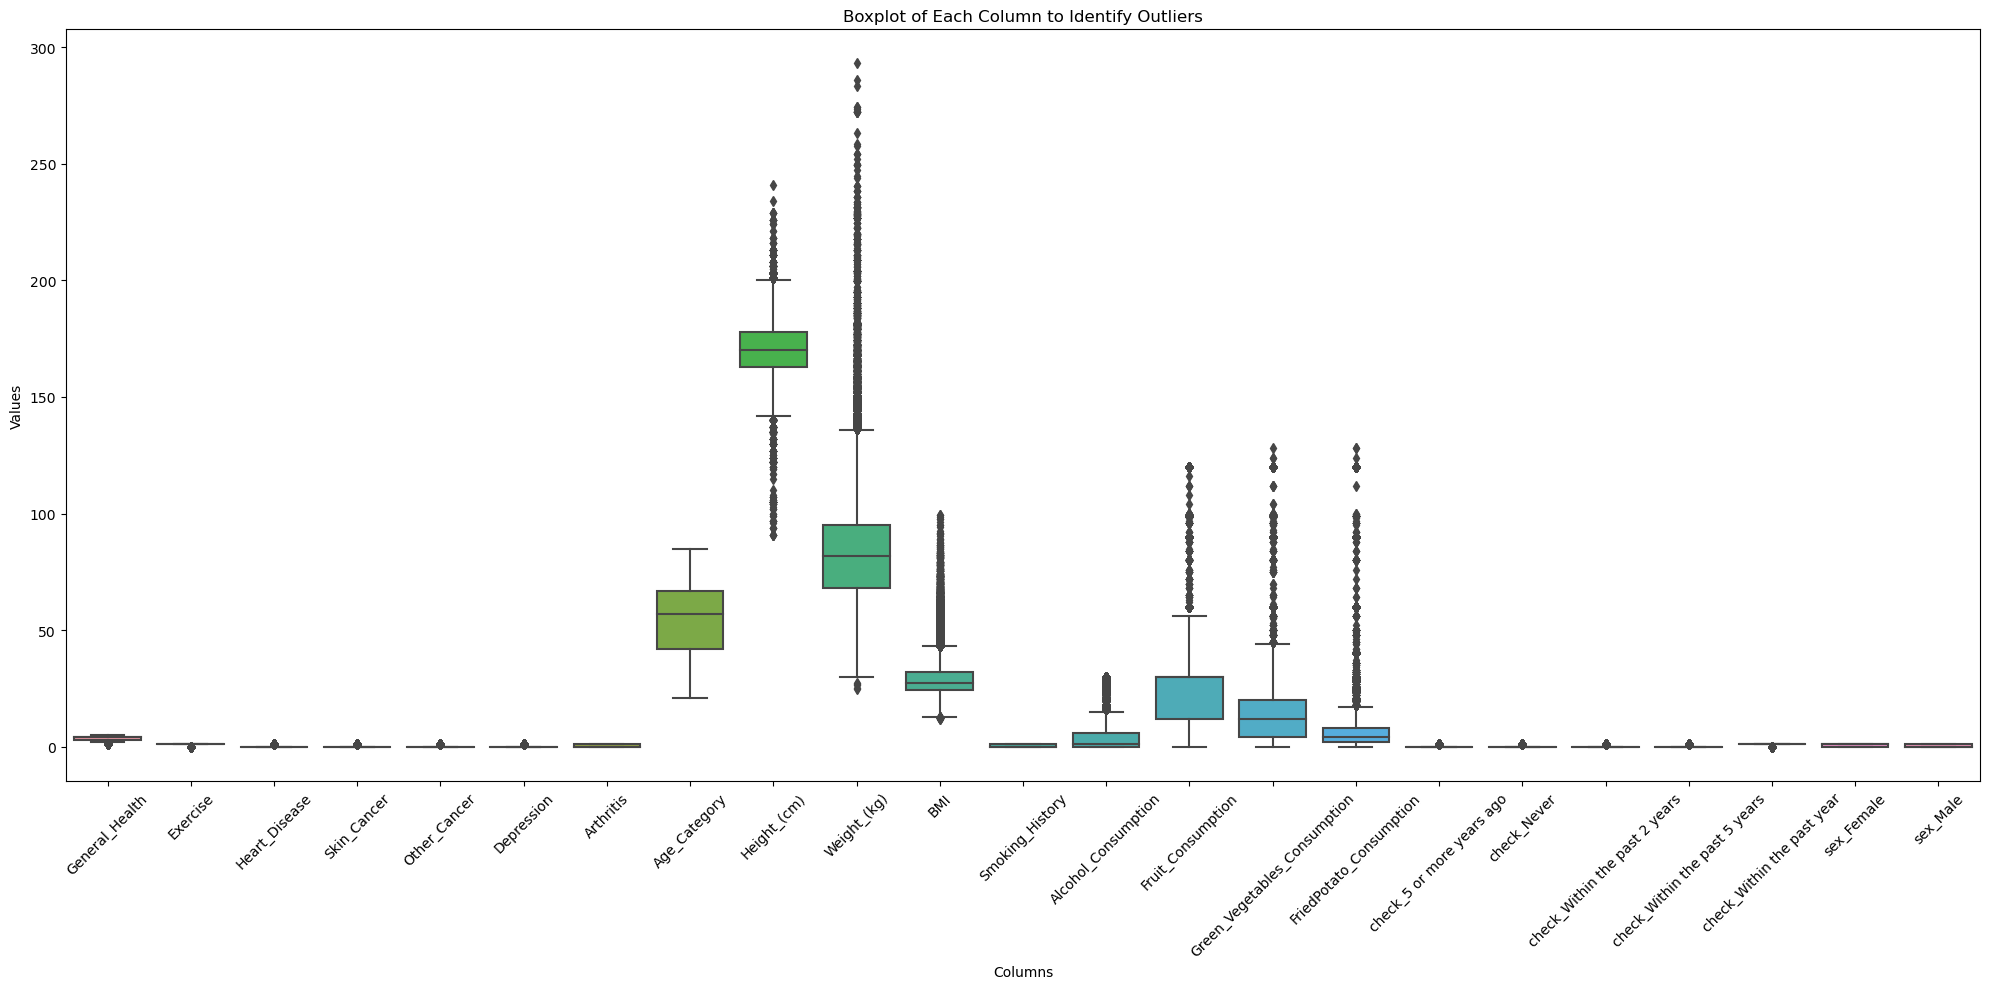

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Each Column to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [20]:
# new_df['Height_(m)']=new_df['Height_(cm)']/100;
# new_df=new_df.drop('Height_(cm)',axis='columns')
# new_df['BMI']=new_df['Weight_(kg)']/(new_df['Height_(m)']**2)

In [21]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage:
# Assuming 'new_df' is your DataFrame and 'Age' is the column with outliers
new_df = remove_outliers_iqr(new_df, 'BMI')
new_df = remove_outliers_iqr(new_df, 'Height_(cm)')
new_df = remove_outliers_iqr(new_df, 'Weight_(kg)')
new_df = remove_outliers_iqr(new_df, 'Alcohol_Consumption')
new_df = remove_outliers_iqr(new_df, 'Fruit_Consumption')
new_df = remove_outliers_iqr(new_df, 'Green_Vegetables_Consumption')
new_df = remove_outliers_iqr(new_df, 'FriedPotato_Consumption')
# new_df = remove_outliers_iqr(new_df, 'General_Health')
# new_df = remove_outliers_iqr(new_df, 'Exercise')
# new_df = remove_outliers_iqr(new_df, 'Exercise')
# new_df = remove_outliers_iqr(new_df, 'Exercise')

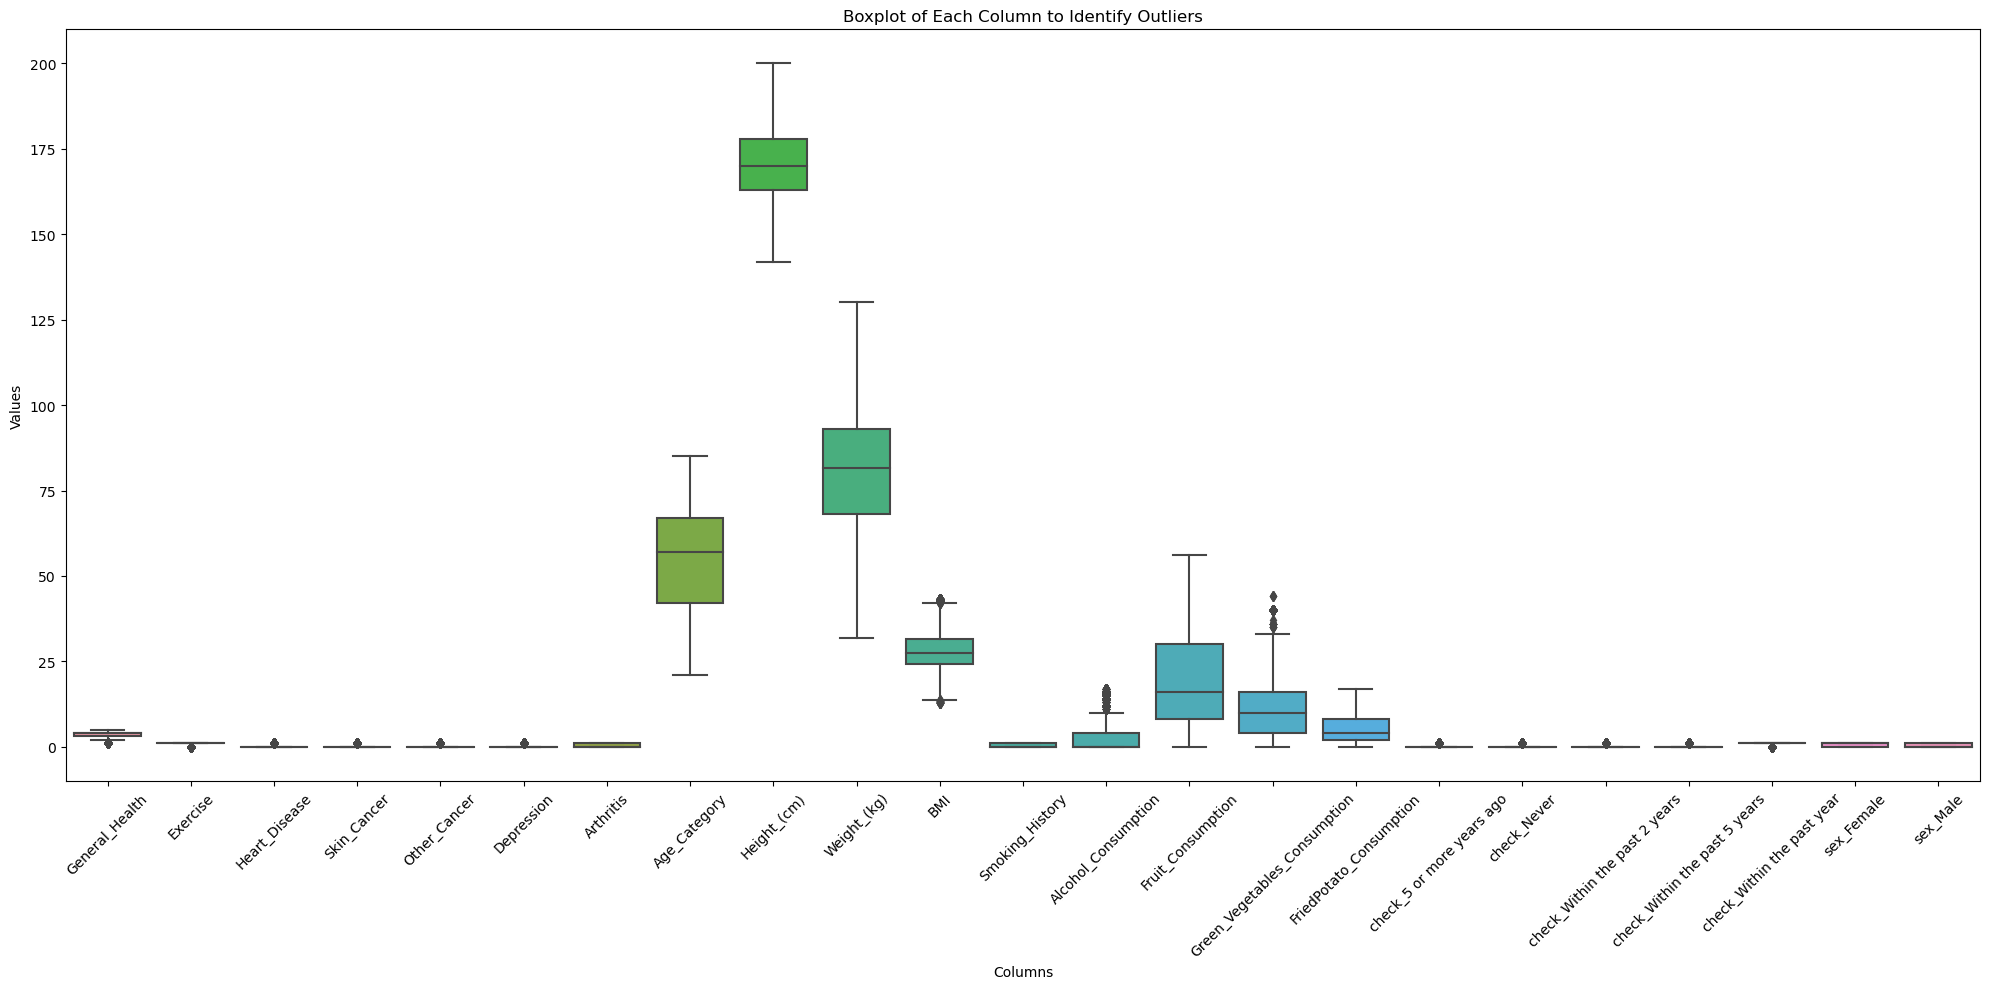

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Each Column to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [23]:
new_df=new_df.drop('check_Never',axis='columns')
# new_df=new_df.drop('check_Within the past 2 years',axis='columns')
# new_df=new_df.drop('check_Within the past 5 years',axis='columns')
# new_df=new_df.drop('check_Within the past year',axis='columns')
# new_df=new_df.drop('check_5 or more years ago',axis='columns')
X=new_df.drop('Heart_Disease',axis='columns')
X
# Y=new_df.Heart_Disease
# Y

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,check_5 or more years ago,check_Within the past 2 years,check_Within the past 5 years,check_Within the past year,sex_Female,sex_Male
0,1,0,0,0,0,00,1,72.0,150,32.66,...,0,30,16,12,0,1,0,0,1,0
1,4,0,0,0,0,11,0,72.0,165,77.11,...,0,30,0,4,0,0,0,1,1,0
2,4,1,0,0,0,11,0,62.0,163,88.45,...,4,12,3,16,0,0,0,1,1,0
3,1,1,0,0,0,11,0,77.0,180,93.44,...,0,30,30,8,0,0,0,1,0,1
4,3,0,0,0,0,00,0,85.0,191,88.45,...,0,8,4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,3,1,0,0,0,00,0,57.0,168,58.97,...,0,16,12,0,0,0,1,0,0,1
308849,4,1,0,0,0,00,0,27.0,168,81.65,...,4,30,8,0,0,0,0,1,0,1
308851,4,1,0,0,1,10,0,32.0,157,61.23,...,4,40,8,4,1,0,0,0,1,0
308852,4,1,0,0,0,00,0,67.0,183,79.38,...,3,30,12,0,0,0,0,1,0,1


In [24]:


# Assign the target variable ('Heart_Disease') to Y (selecting only that column)
Y = new_df[['Heart_Disease']]  # Explicitly select the single column

# Print the shapes of X and Y to verify
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (185970, 22)
Y shape: (185970, 1)


In [25]:
X


,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,check_5 or more years ago,check_Within the past 2 years,check_Within the past 5 years,check_Within the past year,sex_Female,sex_Male
0,1,0,0,0,0,00,1,72.0,150,32.66,...,0,30,16,12,0,1,0,0,1,0
1,4,0,0,0,0,11,0,72.0,165,77.11,...,0,30,0,4,0,0,0,1,1,0
2,4,1,0,0,0,11,0,62.0,163,88.45,...,4,12,3,16,0,0,0,1,1,0
3,1,1,0,0,0,11,0,77.0,180,93.44,...,0,30,30,8,0,0,0,1,0,1
4,3,0,0,0,0,00,0,85.0,191,88.45,...,0,8,4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,3,1,0,0,0,00,0,57.0,168,58.97,...,0,16,12,0,0,0,1,0,0,1
308849,4,1,0,0,0,00,0,27.0,168,81.65,...,4,30,8,0,0,0,0,1,0,1
308851,4,1,0,0,1,10,0,32.0,157,61.23,...,4,40,8,4,1,0,0,0,1,0
308852,4,1,0,0,0,00,0,67.0,183,79.38,...,3,30,12,0,0,0,0,1,0,1


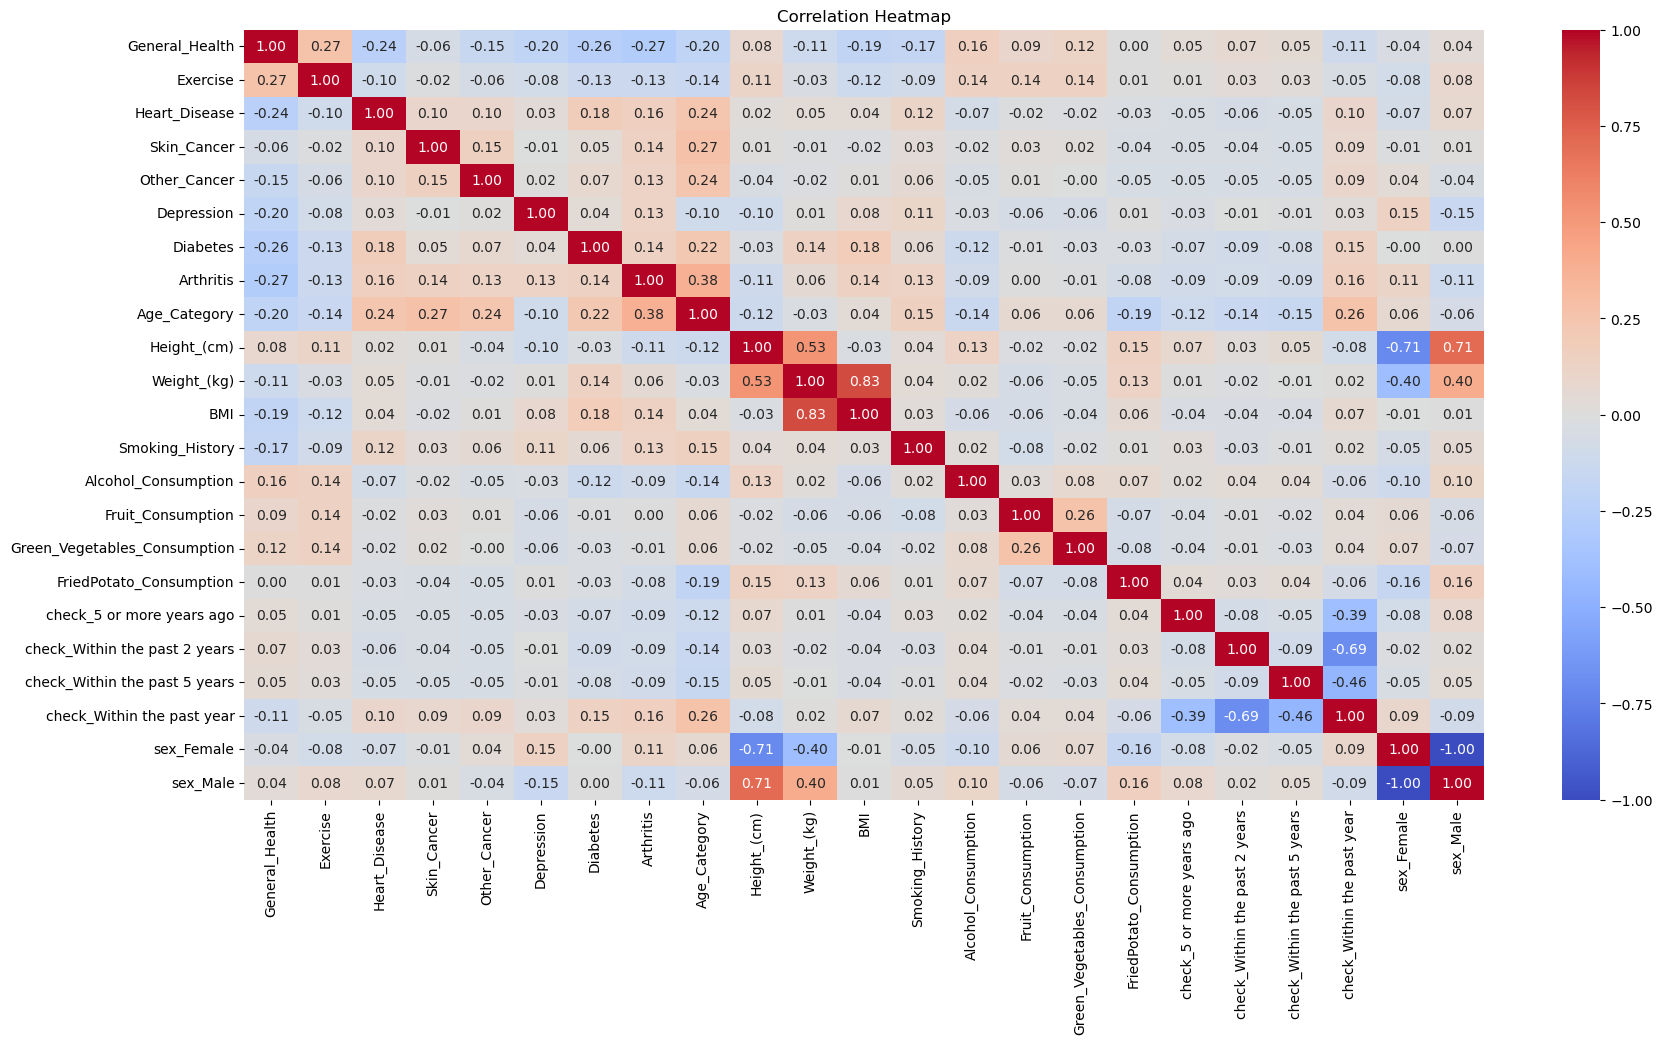

In [26]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

                          Feature  Importance
10                            BMI    0.114266
9                     Weight_(kg)    0.110532
7                    Age_Category    0.101628
8                     Height_(cm)    0.100569
14   Green_Vegetables_Consumption    0.097499
15        FriedPotato_Consumption    0.092638
13              Fruit_Consumption    0.086197
0                  General_Health    0.069666
12            Alcohol_Consumption    0.062707
5                        Diabetes    0.031997
6                       Arthritis    0.020150
4                      Depression    0.019510
1                        Exercise    0.018525
11                Smoking_History    0.016067
3                    Other_Cancer    0.015935
2                     Skin_Cancer    0.013997
20                     sex_Female    0.006926
19     check_Within the past year    0.006875
21                       sex_Male    0.006241
17  check_Within the past 2 years    0.003788
18  check_Within the past 5 years 

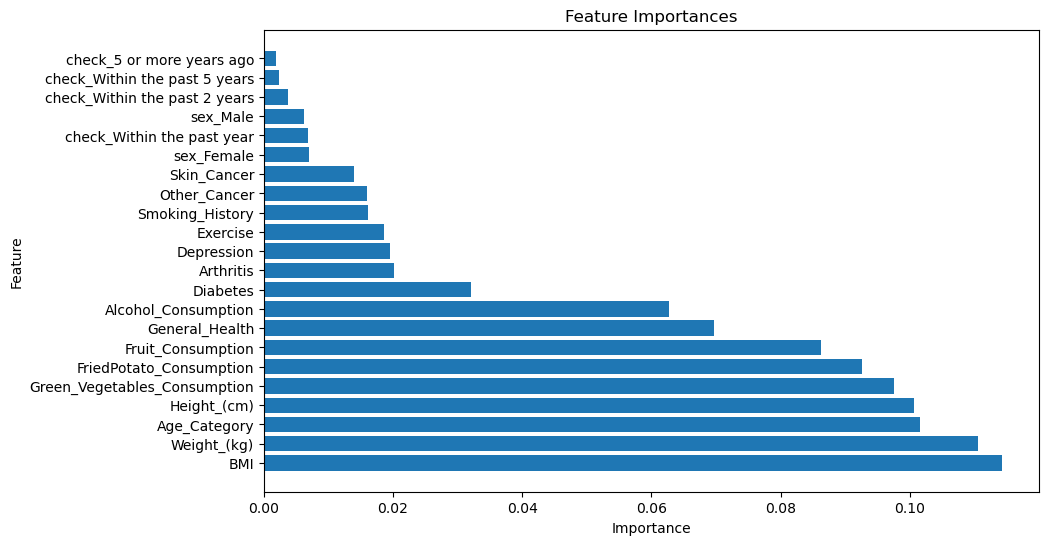

In [27]:
# X = new_df[['BMI', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Fruit_Consumption', 'Age_Category']]
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
etc_model.fit(X_train, y_train)

# Get feature importances
feature_importances = etc_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [28]:
from imblearn.under_sampling import RandomUnderSampler
# Perform undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, Y)

# Split the resampled data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_lr_val = logistic_model.predict(X_val_scaled)
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
print("Logistic Regression Accuracy on Validation Set:", accuracy_lr_val)
print("\nLogistic Regression Classification Report on Validation Set:\n", classification_report(y_val, y_pred_lr_val))

# Model evaluation on test set
y_pred_lr_test = logistic_model.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("\nLogistic Regression Accuracy on Test Set:", accuracy_lr_test)
print("\nLogistic Regression Classification Report on Test Set:\n", classification_report(y_test, y_pred_lr_test))

Logistic Regression Accuracy on Validation Set: 0.7616361071932299

Logistic Regression Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      1393
           1       0.75      0.79      0.77      1443

    accuracy                           0.76      2836
   macro avg       0.76      0.76      0.76      2836
weighted avg       0.76      0.76      0.76      2836


Logistic Regression Accuracy on Test Set: 0.7597588067280229

Logistic Regression Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1632
           1       0.73      0.78      0.76      1519

    accuracy                           0.76      3151
   macro avg       0.76      0.76      0.76      3151
weighted avg       0.76      0.76      0.76      3151



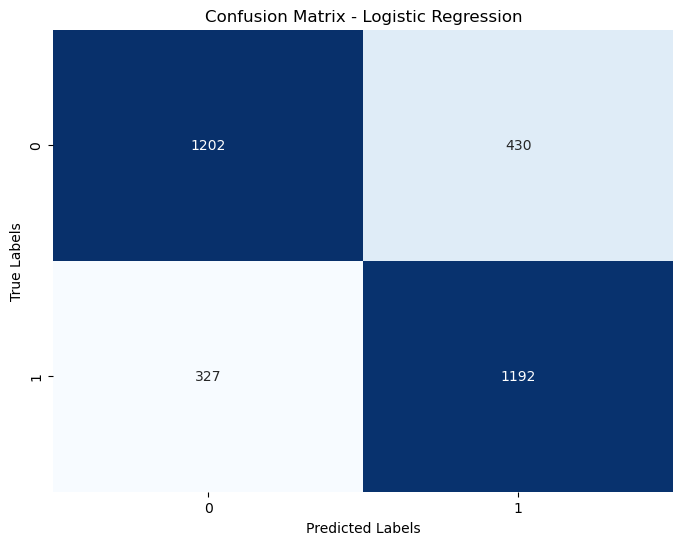

In [30]:
cm_lr = confusion_matrix(y_test, y_pred_lr_test)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


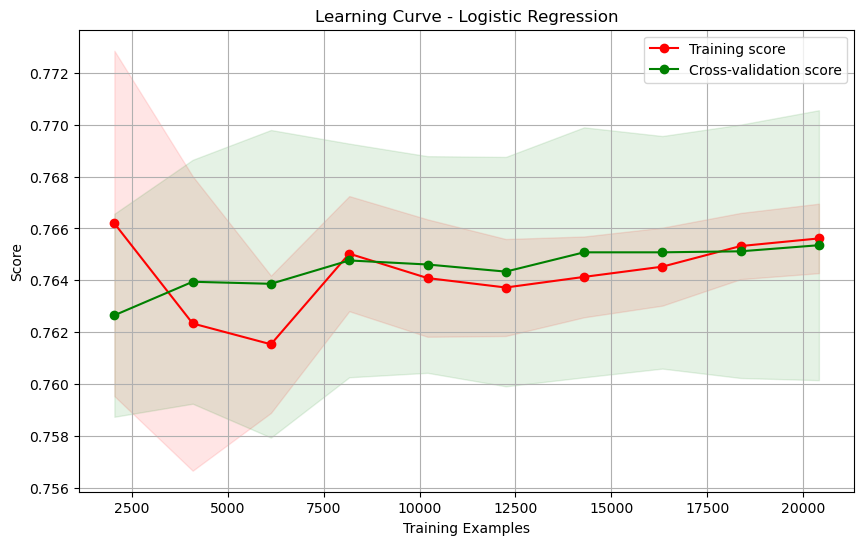

In [31]:
def plot_learning_curve_lgr(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - Logistic Regression")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_lgr(logistic_model, X_train_scaled, y_train)

In [34]:
# # Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_rf_val = rf_model.predict(X_val_scaled)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print("Random Forest Classifier Accuracy on Validation Set:", accuracy_rf_val)
print("\nRandom Forest Classifier Classification Report on Validation Set:\n", classification_report(y_val, y_pred_rf_val))

# Model evaluation on test set
y_pred_rf_test = rf_model.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("\nRandom Forest Classifier Accuracy on Test Set:", accuracy_rf_test)
print("\nRandom Forest Classifier Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf_test))


Random Forest Classifier Accuracy on Validation Set: 0.763046544428773

Random Forest Classifier Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1393
           1       0.75      0.80      0.77      1443

    accuracy                           0.76      2836
   macro avg       0.76      0.76      0.76      2836
weighted avg       0.76      0.76      0.76      2836


Random Forest Classifier Accuracy on Test Set: 0.7597588067280229

Random Forest Classifier Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1632
           1       0.73      0.79      0.76      1519

    accuracy                           0.76      3151
   macro avg       0.76      0.76      0.76      3151
weighted avg       0.76      0.76      0.76      3151



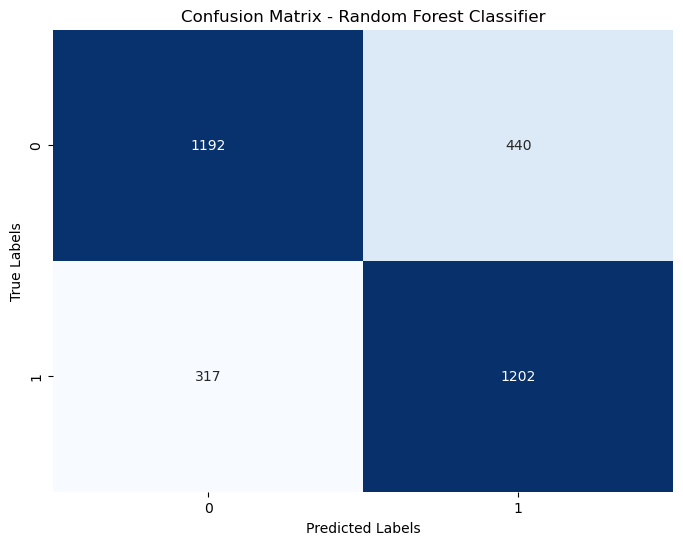

In [35]:
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

# Confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


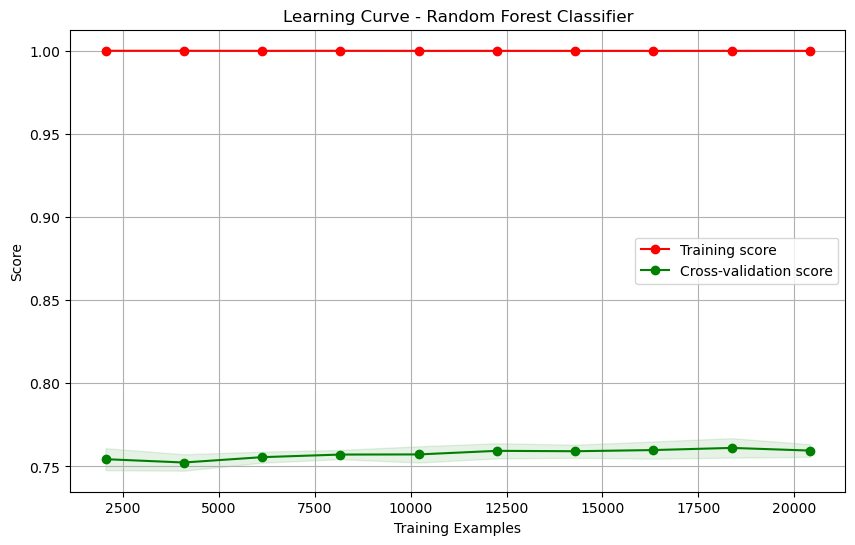

In [36]:
def plot_learning_curve_rfc(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - Random Forest Classifier")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_rfc(rf_model, X_train_scaled, y_train)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_knn_val = knn_model.predict(X_val_scaled)
accuracy_knn_val = accuracy_score(y_val, y_pred_knn_val)
print("KNN Accuracy on Validation Set:", accuracy_knn_val)
print("\nKNN Classification Report on Validation Set:\n", classification_report(y_val, y_pred_knn_val))

# Model evaluation on test set
y_pred_knn_test = knn_model.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("\nKNN Accuracy on Test Set:", accuracy_knn_test)
print("\nKNN Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_test))

KNN Accuracy on Validation Set: 0.732722143864598

KNN Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1393
           1       0.73      0.75      0.74      1443

    accuracy                           0.73      2836
   macro avg       0.73      0.73      0.73      2836
weighted avg       0.73      0.73      0.73      2836


KNN Accuracy on Test Set: 0.7137416693113298

KNN Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72      1632
           1       0.69      0.74      0.71      1519

    accuracy                           0.71      3151
   macro avg       0.71      0.71      0.71      3151
weighted avg       0.72      0.71      0.71      3151



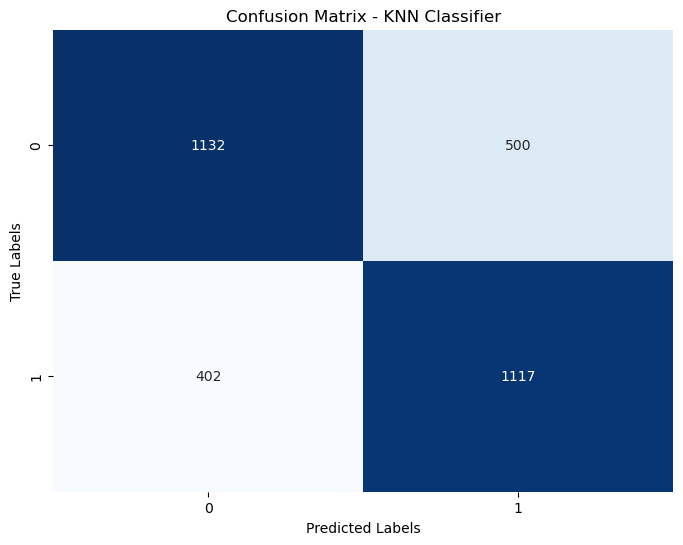

In [38]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test)

# Confusion matrix for KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

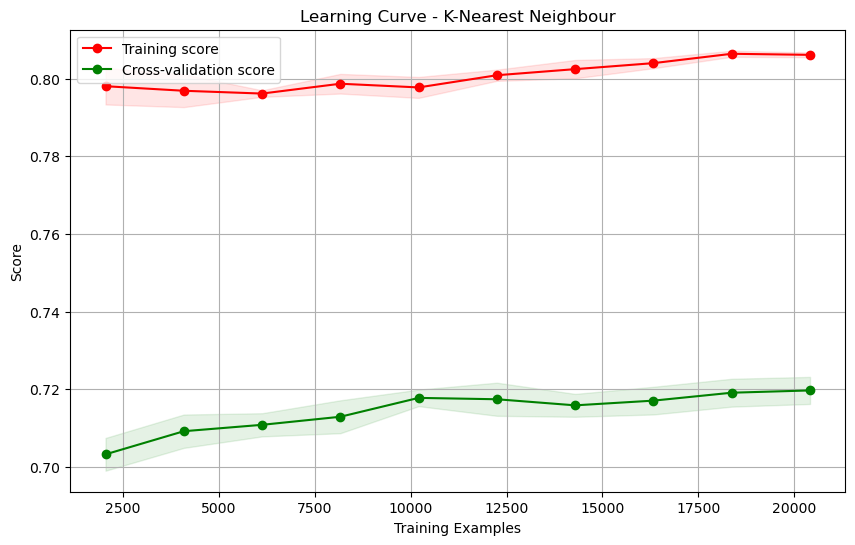

In [39]:
def plot_learning_curve_knn(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - K-Nearest Neighbour")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_knn(knn_model, X_train_scaled, y_train)

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic',  # Specify objective for classification
                       max_depth=5,  # Adjust tree depth as needed
                       n_estimators=100,  # Adjust number of trees
                       use_label_encoder=False)  # Prevent potential issues with label encoding

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_xgb_val = model.predict(X_val_scaled)

# Evaluate model performance on validation set
accuracy_xgb_val = accuracy_score(y_val, y_pred_xgb_val)
print("XGBoost Accuracy on Validation Set:", accuracy_xgb_val)
print("\nXGBoost Classification Report on Validation Set:\n", classification_report(y_val, y_pred_xgb_val))

# Make predictions on the test set (optional)
y_pred_xgb_test = model.predict(X_test_scaled)

# Evaluate model performance on test set (optional)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
print("\nXGBoost Accuracy on Test Set:", accuracy_xgb_test)
print("\nXGBoost Classification Report on Test Set:\n", classification_report(y_test, y_pred_xgb_test))

XGBoost Accuracy on Validation Set: 0.7609308885754584

XGBoost Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1393
           1       0.75      0.79      0.77      1443

    accuracy                           0.76      2836
   macro avg       0.76      0.76      0.76      2836
weighted avg       0.76      0.76      0.76      2836


XGBoost Accuracy on Test Set: 0.7632497619803237

XGBoost Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1632
           1       0.73      0.80      0.76      1519

    accuracy                           0.76      3151
   macro avg       0.76      0.76      0.76      3151
weighted avg       0.77      0.76      0.76      3151



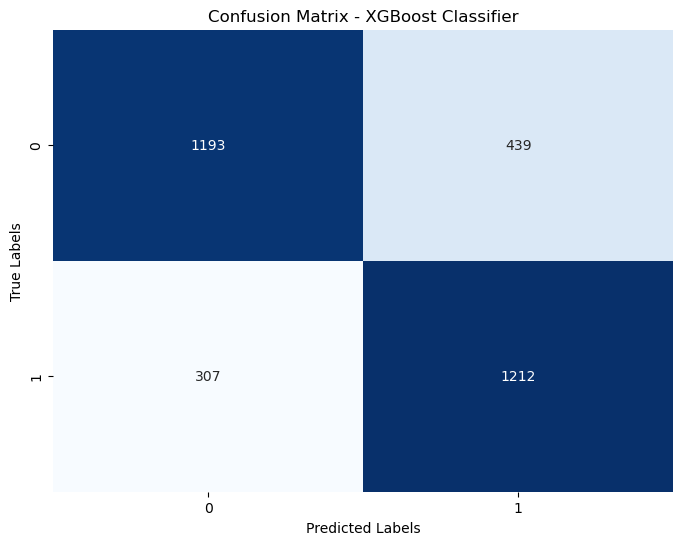

In [41]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb_test)

# Confusion matrix for XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

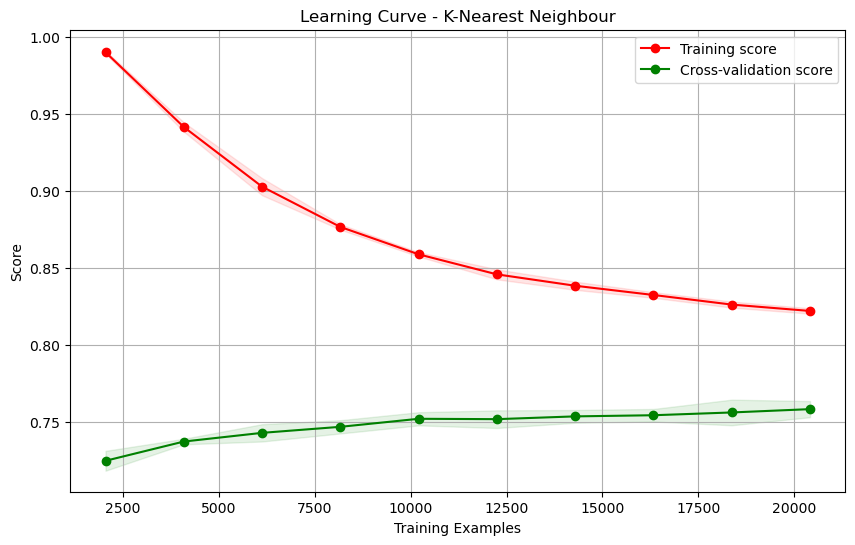

In [42]:
def plot_learning_curve_xgb(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - XGBoost")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_knn(model, X_train_scaled, y_train)